In [1]:
TChain * cRcp, * cSpectra;

TCanvas * can = new TCanvas( "can", "can" );

TH1D * rcp_N_ppT, *spectra_N_ppT;

TH1D * h_ratio;

In [2]:
cRcp = new TChain( "rcpPicoDst" );
cSpectra = new TChain( "SpectraPicoDst" );

In [3]:
cRcp->Add( "RcpPicoDst/*.root" );
cSpectra->Add( "SpectraPicoDst/*.root" );

In [4]:
cRcp->Draw( "ppT>>rcp_ppT(50, -5, 5)", " dca < 1.0 && nHitsFit > 16 && nHitsDedx > 11 && (nHitsFit / nHitsPossible) > 0.52 && pEta < 0.25 && matchFlag>=1 && fabs(yLocal) < 1.6 && fabs(zLocal) < 2.8 && beta > 0" );
cSpectra->Draw( "ppT>>spectra_ppT(50, -5, 5)", " dca < 1.0 && nHitsFit > 16 && nHitsDedx > 11 && (nHitsFit / nHitsPossible) > 0.52 && pEta < 0.25 && matchFlag>=1 && fabs(yLocal) < 1.6 && fabs(zLocal) < 2.8 && beta > 0" );

In [5]:
cRcp->Draw( "bin9>>rcp_bin9" );
cSpectra->Draw( "bin9>>spectra_bin9" );

In [6]:
rcp_N_ppT = (TH1D*)rcp_ppT->Clone( "rcp_N_ppT" );
spectra_N_ppT = (TH1D*)spectra_ppT->Clone( "spectra_N_ppT" );

In [7]:
rcp_N_ppT->Scale( 1.0 / rcp_bin9->GetBinContent( 1 ) );
spectra_N_ppT->Scale( 1.0 / spectra_bin9->GetBinContent( 1 ) );

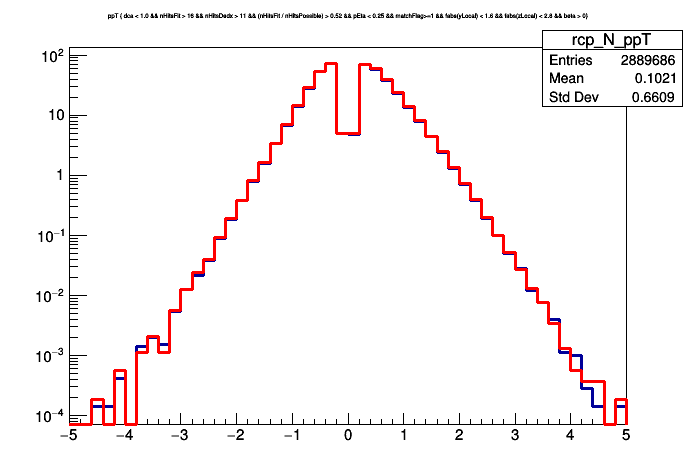

In [8]:
rcp_N_ppT->Draw();
spectra_N_ppT->Draw("same");
spectra_N_ppT->SetLineColor( kRed );
can->SetLogy(1);
can->Draw()


****************************************
Minimizer is Linear
Chi2                      =  0.000682994
NDf                       =           19
p0                        =     0.967416   +/-   0.219934    


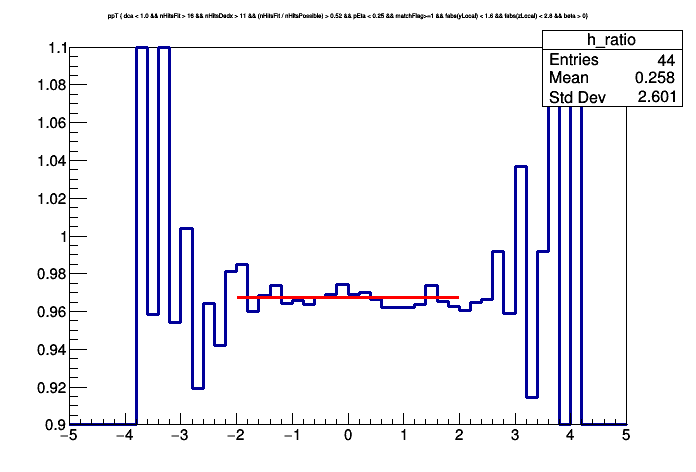

In [11]:
h_ratio = (TH1D*) rcp_N_ppT->Clone( "h_ratio" );
h_ratio->Divide( spectra_N_ppT );
h_ratio->Draw();
h_ratio->GetYaxis()->SetRangeUser( 0.9, 1.1 );
h_ratio->Fit( "pol0", "R", "", -2, 2 );
can->SetLogy(0);
can->Draw();